# Introduction:

Welcome to the Autism Spectrum Disorder (ASD) Prediction Project! In this notebook, we dive into the fascinating domain of data science to develop machine learning models that predict the likelihood of ASD based on various features.

# Project Overview:

This project centers around a dataset comprising survey responses from individuals who have filled out an application form. The dataset includes labels indicating whether or not each person has received a diagnosis of autism.

Our primary goal is to leverage the power of machine learning algorithms to create models capable of accurately predicting the likelihood of ASD based on the provided features. By doing so, we aim to contribute to a better understanding of ASD through quantitative analysis and predictive modeling.

Let's explore the data and work towards improving our ability to identify ASD through this exciting data-driven project.

# Importing Libraries

In [78]:
# Data Manipulation and Analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Plotly for Interactive Visualizations
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Data Pre-processing and Scaling
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Plotly Subplots and Initialization
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier


# Model Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, auc, roc_auc_score, recall_score, precision_score, confusion_matrix

# Model Selection and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Interpretation and Feature Importance
import shap

# for saving and loading models
import joblib  

# Initialize Plotly Notebook Mode
init_notebook_mode(connected=True)

# Configure Plotly Templates
pio.templates.default = "none"

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [79]:
df1 = pd.read_csv('/Users/nouhailanigrou/Desktop/ID/ID2/S3/ML/ASD/ASD.csv')
df2 = pd.read_csv('/Users/nouhailanigrou/Desktop/ID/ID2/S3/ML/ASD/autism_screening.csv')

In [80]:
df1 = df1.drop(["ID"], axis=1)

In [81]:
df1 = df1.rename(columns = {'jaundice':'jundice'}, errors="raise")

In [82]:
df1['Class/ASD'] = df1['Class/ASD'].replace(0, "NO")

In [83]:
df1['Class/ASD'] = df1['Class/ASD'].replace(1, "YES")

In [84]:
df = pd.concat([df1, df2], ignore_index=True)

In [85]:
df.reset_index(drop=True, inplace=True)

In [86]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,NO
1,0,0,0,0,0,0,0,0,0,1,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,NO
2,1,1,1,1,1,1,0,0,1,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,YES
3,0,0,0,1,0,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,NO
4,0,0,0,0,1,0,0,0,1,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.000000,18 and more,Self,YES
1500,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.000000,18 and more,Parent,NO
1501,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.000000,18 and more,?,YES
1502,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.000000,18 and more,Self,NO


A1-10-Score features explanation:
   - A1_Score: I often notice small sounds when others do not
   - A2_Score: I usually concentrate more on the whole picture, rather than the small details
   - A3_Score: I find it easy to do more than one thing at one
   - A4_Score: If there is an interruption, I can switch back to what I was doing very quickly
   - A5_Score: I find it easy to read between the lines when someone is talking to me
   - A6_Score: I know how to tell if someone listening to me is getting bored
   - A7_Score: When I'm reading a story, I find it difficult to work out the characters'intentions
   - A8_Score: I like to collect information about categories of things (e.g. types of car, types of bird etc.)
   - A9_Score: I find it easy to work out what someone is thinking or feeling just by looking at their face
   - A10_Score: I find it difficult to work out people's intentions

Note:
- Score 1 for A1_Score, A7_Score, A8_Score, and A10_Score indicates Agreement.
- Score 1 for A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A9_Score indicates Disagreement.


This Information is derived from the AQ questionnaire developed by the Autism Research Center at Cambridge University.

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [87]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1502.000000,1504.000000
mean,0.647606,0.364362,0.384973,0.452793,0.476729,0.244016,0.341090,0.685505,0.319814,0.513298,29.119737,6.036452
std,0.477875,0.481411,0.486751,0.497932,0.499624,0.429645,0.474233,0.464469,0.466559,0.499989,14.688718,3.427324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.865532,3.484394
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.000000,5.780131
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,34.000000,8.258338
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,13.390868


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         1504 non-null   int64  
 1   A2_Score         1504 non-null   int64  
 2   A3_Score         1504 non-null   int64  
 3   A4_Score         1504 non-null   int64  
 4   A5_Score         1504 non-null   int64  
 5   A6_Score         1504 non-null   int64  
 6   A7_Score         1504 non-null   int64  
 7   A8_Score         1504 non-null   int64  
 8   A9_Score         1504 non-null   int64  
 9   A10_Score        1504 non-null   int64  
 10  age              1502 non-null   float64
 11  gender           1504 non-null   object 
 12  ethnicity        1504 non-null   object 
 13  jundice          1504 non-null   object 
 14  austim           1504 non-null   object 
 15  contry_of_res    1504 non-null   object 
 16  used_app_before  1504 non-null   object 
 17  result        

In [89]:
df.duplicated().sum()

5

In [90]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [91]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,NO
1,0,0,0,0,0,0,0,0,0,1,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,NO
2,1,1,1,1,1,1,0,0,1,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,YES
3,0,0,0,1,0,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,NO
4,0,0,0,0,1,0,0,0,1,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.000000,18 and more,Self,YES
1495,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.000000,18 and more,Parent,NO
1496,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.000000,18 and more,?,YES
1497,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.000000,18 and more,Self,NO


Let's check the categorical features uniqueness.

In [92]:
df['Class/ASD'].unique()

array(['NO', 'YES'], dtype=object)

In [93]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [94]:
df['ethnicity'].unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', '?', 'others', 'Latino', 'Turkish', 'Others',
       'Hispanic', 'Pasifika'], dtype=object)

In [95]:
df['jundice'].unique()

array(['no', 'yes'], dtype=object)

In [96]:
df['austim'].unique()

array(['no', 'yes'], dtype=object)

In [97]:
df['contry_of_res'].unique()

array(['United States', 'Australia', 'United Kingdom', 'New Zealand',
       'Italy', 'Nicaragua', 'Canada', 'United Arab Emirates',
       'Netherlands', 'Sri Lanka', 'India', 'Armenia', 'Sierra Leone',
       'Argentina', 'Azerbaijan', 'Iceland', 'Egypt', 'Serbia',
       'Afghanistan', 'Costa Rica', 'Jordan', 'Angola', 'Pakistan',
       'Brazil', 'Ireland', 'Kazakhstan', 'Viet Nam', 'Ethiopia',
       'Austria', 'Finland', 'France', 'Malaysia', 'Japan', 'Spain',
       'Philippines', 'Iran', 'Czech Republic', 'Russia', 'Romania',
       'Mexico', 'Belgium', 'Aruba', 'Uruguay', 'Indonesia', 'Ukraine',
       'AmericanSamoa', 'Germany', 'China', 'Iraq', 'Tonga',
       'South Africa', 'Saudi Arabia', 'Hong Kong', 'Bahamas', 'Ecuador',
       'Cyprus', 'Bangladesh', 'Oman', 'Bolivia', 'Sweden', 'Niger',
       'Burundi', 'Lebanon', 'Chile', 'Portugal', 'Turkey', 'Nepal'],
      dtype=object)

In [98]:
df['used_app_before'].unique()

array(['no', 'yes'], dtype=object)

In [99]:
df['age_desc'].unique()

array(['18 and more'], dtype=object)

In [100]:
df['relation'].unique()

array(['Self', '?', 'Health care professional', 'Parent', 'Relative',
       'Others'], dtype=object)

Let's check if there are any null values.

In [101]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

There are only 2 null values in the whole Dataset.

# Feature Distribution

First, let's clean some mistakes.

In [102]:
df = df.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res', 'jundice':'jaundice'}, errors="raise")

df['country_of_res'][df['country_of_res'] == 'others'] = 'Others'

df['ethnicity'][df['ethnicity'] == 'others'] = 'Others'

df['ethnicity'] = df['ethnicity'].str.replace("?", "unknown")

df['relation'] = df['relation'].str.replace("?", "Unknown")

 - Target Class Balance

In [103]:
ASD_pos = df[df['Class/ASD']=='YES']
ASD_neg = df[df['Class/ASD']=='NO']
label = ['ASD Positive (=1)', 'ASD Negative (=0)']
value = [ASD_pos.shape[0], ASD_neg.shape[0]]

fig = go.Figure(go.Bar(
    y=value,
    x=label,
    text=[f"<b style='color: #f'>{(v * 100 / len(df)):.2f}%</b>" for v in value],
    textposition=['outside', 'inside'],
    textfont=dict(family="sans serif", size=16, color="black"),
    marker_color=['lavender', '#c11754'],
    opacity=1.0,
))

fig.update_layout(
    title='<b>Target: ASD Class <b>',
    font_family="San Serif",
    template='simple_white',
    yaxis_linewidth=2.5,
    width=600,
    height=400,
    bargap=0.2,
    barmode='group',
    titlefont={'size': 20},
    xaxis=dict(showgrid=False, showline=True),
    yaxis=dict(showgrid=False, showline=False, showticklabels=False, ticks=''),
)

fig.show()

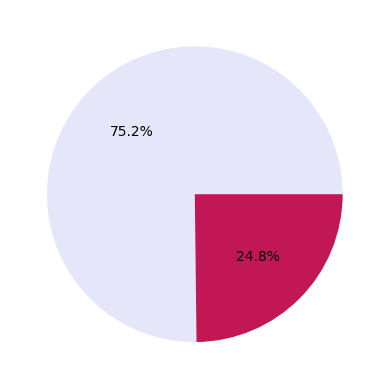

In [104]:
colors = ['lavender', '#c11754']

plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%', colors=colors)
plt.show()

As we can see the Target class (ASD Class) is imbalanced !

Around 75% of the target is ASD negative (0) and 25% ASD positive (1)

 - Gender

In [105]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['gender'],histnorm='percent',
              name='ASD_pos', marker_color = 'lavender'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['gender'],histnorm='percent',
              name='ASD_neg', marker_color = "#c11754", opacity=0.85),
             )  

fig.update_layout(title="Gender of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.20, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending')
fig.show()

Gender distribution is balanced.

 - Ethnicity

In [106]:
fig = px.histogram(df, x="ethnicity",
                   width=600, 
                   height=400,
                   histnorm='percent',
                   template="simple_white"
                   )

fig.update_layout(title="Ethnic group of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending')

colors = ['lavender',] * 15  
colors[1] = '#c11754' 
colors[0] = '#6d1f56' 


fig.update_traces(marker_color=colors, 
                )
fig.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['ethnicity'],histnorm='percent',
              name='ASD_pos', marker_color = 'lavender'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['ethnicity'],histnorm='percent',
              name='ASD_neg', marker_color = '#c11754', opacity=0.85),
             )  

fig.update_layout(title="Ethnic group of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

11 ethnic categories are present in the data. The majorities are White-European followed by Asian, Middle Eastern and unknown category. Among the ASD-positive subjects, White-European make up 57% while being only 29% of the total sample (dataframe). Asian (9%) and Black & "Latino" come in second and third.

 - Jaundice

In [107]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['jaundice'],histnorm='',
              name='ASD_pos', marker_color = 'lavender'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['jaundice'],histnorm='',
              name='ASD_neg', marker_color = '#c11754', opacity=0.85),
             )  

fig.update_layout(title="Whether the patient had jaundice at the time of birth", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

The majority of the patients had no jaundice at the time of birth. Of those who had jaundice at birth, the majority (164 patients) had tested ASD_negative compared to the 101 positive cases. Jaundice at birth may not mean ASD positivity.

 - Autism in the family

In [108]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['autism'],histnorm='',
              name='ASD_pos', marker_color = 'lavender'),)
fig.add_trace(go.Histogram(x=ASD_neg['autism'],histnorm='',
              name='ASD_neg', marker_color = '#c11754', opacity=0.85),)  
fig.update_layout(title="Whether an immediate family member has been diagnosed with autism", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 
fig.show()

1034 patients with ASD_neg don't have a family member who has been diagnosed with Autism. However, those who have autistic family members are likely to be diagnosed with autism. 114 out of 372 of the ASD_positive patients have family members with autism.

 - Screening Test scores (QA1-10)

In [109]:
fig = make_subplots(rows=5, cols=2,
                   subplot_titles=('A1_Score','A6_Score', 'A2_Score', 'A7_Score','A3_Score', 
                                   'A8_Score','A4_Score','A9_Score', 'A5_Score','A10_Score',
                                   ))     
num_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for i, feat in enumerate(num_cols[0:5]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'lavender'),
                  row=i+1, col=1)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = '#c11754', opacity=0.85),

                 row=i+1, col=1)    
    fig.update_layout(barmode='overlay')
                           
for j, feat in enumerate(num_cols[5:12]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'lavender'),
                 row=j+1, col=2)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = '#c11754', opacity=0.85),
                 row=j+1, col=2)    
    fig.update_layout(barmode='overlay')

fig.update_layout(title=" <b> Screening test score (A1- A10) <b>",
                      font_family="San Serif",
                      titlefont={'size': 24},
                      width=900, height=1200,
                      template='simple_white',
                      showlegend=False,
                      bargap=0.1, 
                      bargroupgap=0.1,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                     )

fig.update_layout(barmode='group')
fig.show()

The QA test scores looks binary (they are either 1 or 0). Most of the screening questions except A8_score and (slightly) A1_scores, have fairly separated the positive and negative cases. Another amazing observation is that if the score of some indicator is 0 then the chances of that person not having autism is quite high.

 - Age

In [110]:
import plotly.figure_factory as ff

group_labels = ['ASD_pos', 'ASD_neg']
ASD_pos = ASD_pos.dropna(subset=['age'])
ASD_neg = ASD_neg.dropna(subset=['age'])
fig = ff.create_distplot([ASD_pos['age'], ASD_neg['age']],
                         group_labels, 
                         show_hist=True, 
                         show_rug=True,
                         colors=['purple', '#c11754']
                        )

fig.update_layout(
    title='<b>Age distribution<b>',
    xaxis_title='Age',
    yaxis_title='Density',
    titlefont={'size': 20},
    font_family='San Serif',
    width=700,
    height=500,
    template="simple_white",
    showlegend=True,
    legend=dict(
        orientation="v",
        y=1, 
        yanchor="top", 
        x=1.0, 
        xanchor="right"
    ),
    xaxis=dict(range=[10, 80])
)

fig.add_vrect(
    x0=9, x1=35,
    annotation_text="Senior patients", annotation_position="top",
    fillcolor="lavender", opacity=0.5,
    layer="below", line_width=0,
)

fig.show()

We can clearly observe that the age distribution is right skewed which means there are few extremely high age values that influence the overall distribution (The right tail of the distribution is longer and contains relatively extreme values), As we know that skewed data impacts the performance of the model. Also, most individuals diagnosed with ASD are between 19 and 30 years old.

# Feature Engineering

# 1. Dropping irrelevent features

   - age_desc
   - used_app_before
   - country_of_res
   - result

In [111]:
df = df.drop(["country_of_res","age_desc","used_app_before","result"], axis=1)

# 2. Handling Missing values

In [112]:
df['age'].fillna(df['age'].mean(), inplace=True)

# 3. Handling Categorical Data

In [113]:
label_encoder = preprocessing.LabelEncoder()

 - Target

In [114]:
print(df['Class/ASD'].unique())
df['Class/ASD']= label_encoder.fit_transform(df['Class/ASD'])
print(df['Class/ASD'].unique())

['NO' 'YES']
[0 1]


 - Gender

In [115]:
print(df['gender'].unique())
df['gender']= label_encoder.fit_transform(df['gender'])
print(df['gender'].unique())

['f' 'm']
[0 1]


 - Jaundice

In [116]:
print(df['jaundice'].unique())
df['jaundice']= label_encoder.fit_transform(df['jaundice'])
print(df['jaundice'].unique())

['no' 'yes']
[0 1]


 - Autism

In [117]:
print(df['autism'].unique())
df['autism']= label_encoder.fit_transform(df['autism'])
print(df['autism'].unique())

['no' 'yes']
[0 1]


 - Relation

In [118]:
print(df['relation'].unique())
df['relation']= label_encoder.fit_transform(df['relation'])
print(df['relation'].unique())

['Self' 'Unknown' 'Health care professional' 'Parent' 'Relative' 'Others']
[4 5 0 2 3 1]


 - Ethnicity

In [119]:
print(df['ethnicity'].unique())
df['ethnicity']= label_encoder.fit_transform(df['ethnicity'])
print(df['ethnicity'].unique())

['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern '
 'unknown' 'Others' 'Latino' 'Turkish' 'Hispanic' 'Pasifika']
[ 9  7  1  0  4 10  5  3  8  2  6]


# 5. Heatmap

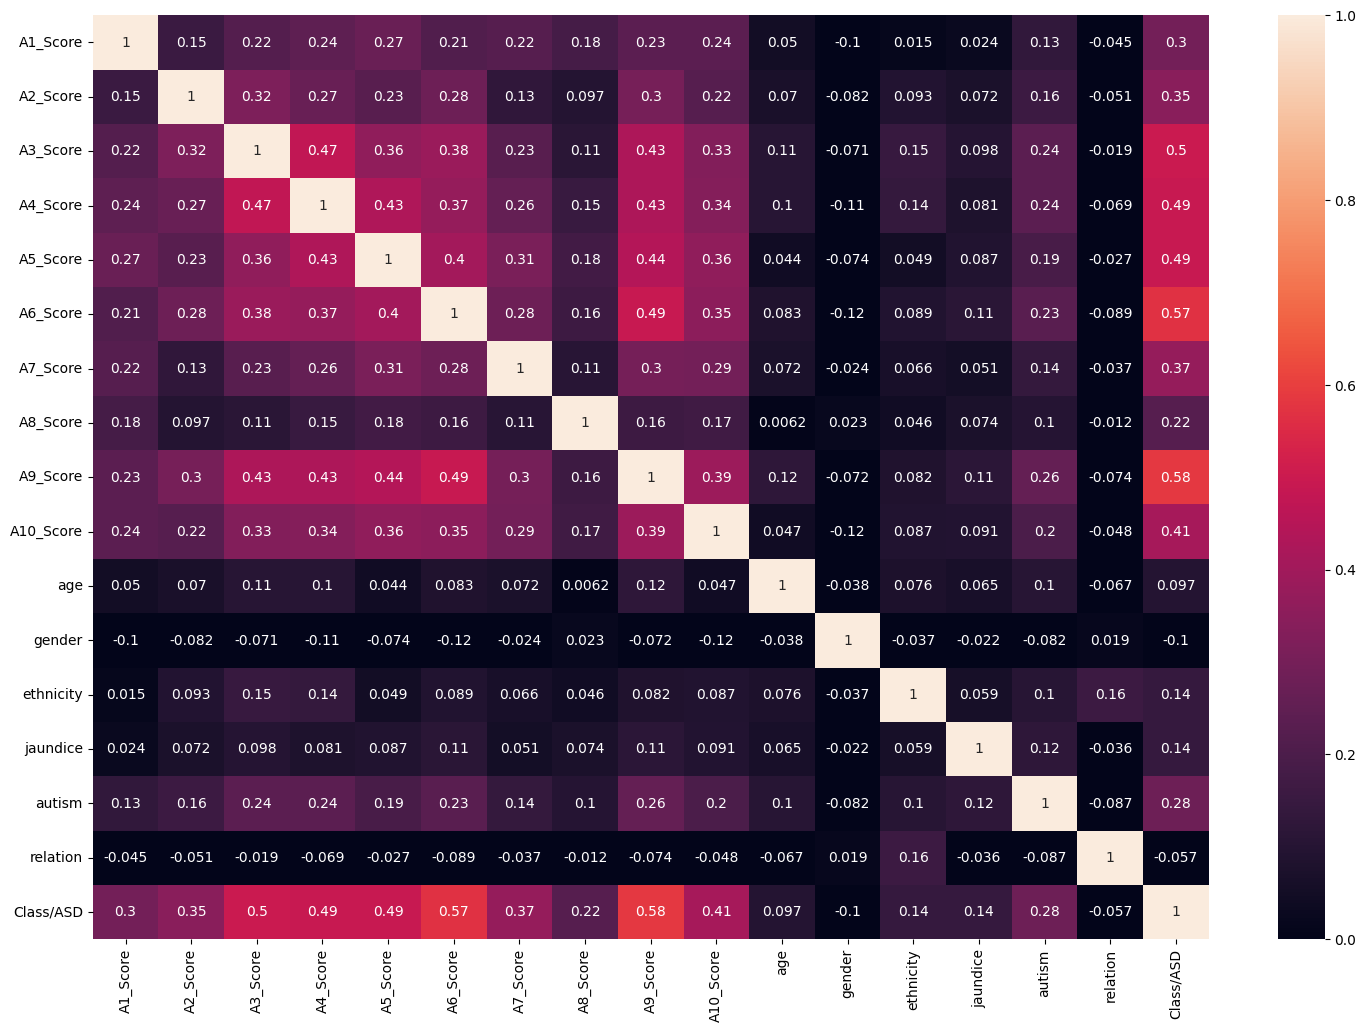

In [120]:
fig = plt.figure(figsize = (18,12))
sns.heatmap(data=df.corr(), annot=True, vmin=0, vmax=1,)
plt.show()

We see that A9_Score,A6_Score, A5_Score, and A3_Score  are moderately correlated with the target (Class/ASD).
We also notice that A1_Score and A8_Score have weak correlation with the target.

# Model Building

As we noticed earlier in our EDA, our Target is imbalanced which is going to affect the accuracy of our classification models. So in this case we have to balance our Data before building the model.

# Data Splitting

In [121]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The stratify=y parameter ensures that the class distribution on the dataset is preserved in the split datasets, this is important since we're dealing with imbalanced datasets. The 'stratify' parameter helps to maintain the proportion of classes in both the training and test sets, making the split representative of the original data.

# Feature Scaling

In [122]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancing the Classes

To Balance the Data we will use the SMOTE technique which stands for Synthetic Minority Over-sampling, it focuses on the minority class. and generates synthetic samples by interpolating between that instance and its nearest neighbors in feature space.This creates new synthetic instances that are similar to the existing minority class instances.

In [123]:
df["Class/ASD"].value_counts()

Class/ASD
0    1127
1     372
Name: count, dtype: int64

 - Classes distibution before Oversampling 

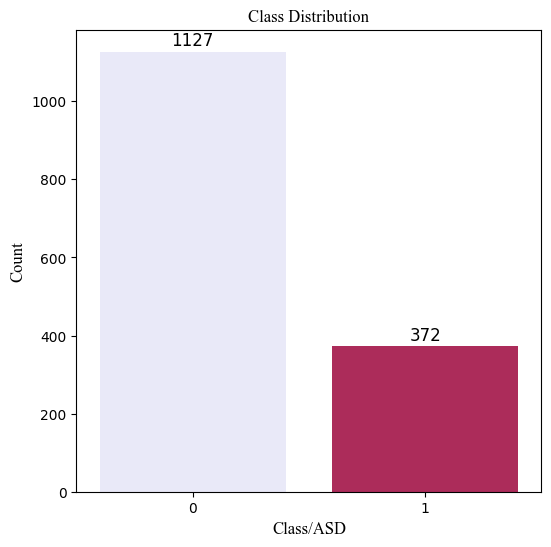

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

class_label = df["Class/ASD"].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=class_label.index, y=class_label, palette=["lavender", "#c11754"])
plt.title('Class Distribution', fontsize=12, fontname = 'Times new Roman')
plt.xlabel('Class/ASD', fontsize=12,fontname = 'Times new Roman')
plt.ylabel('Count', fontsize=12,fontname = 'Times new Roman')

for i, count in enumerate(class_label):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

 - Oversampling

In [125]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class/ASD'] = y_resampled

- Classes distribution after oversampling

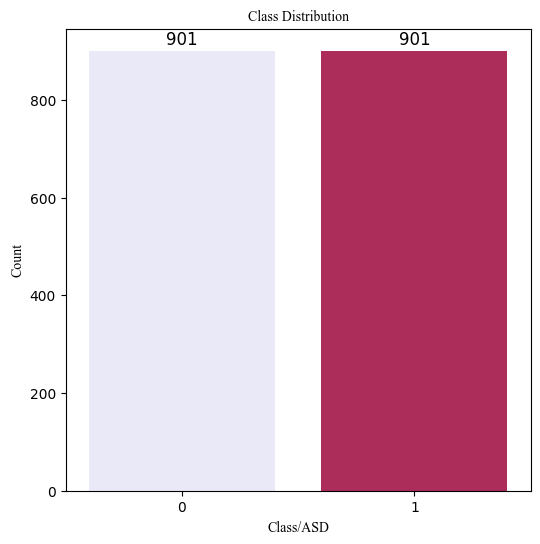

In [126]:
class_label = df_resampled["Class/ASD"].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=class_label.index, y=class_label, palette=["lavender", "#c11754"])
plt.title('Class Distribution', fontsize=10,fontname = 'Times new Roman')
plt.xlabel('Class/ASD', fontsize=10,fontname = 'Times new Roman')
plt.ylabel('Count', fontsize=10,fontname = 'Times new Roman')

for i, count in enumerate(class_label):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [127]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix

accuracy_list = []
f1_list = []
roc_auc_list = []

def result(model):
    
    model.fit(X_resampled, y_resampled)
    
    
    pred = model.predict(X_test_scaled)
    print()
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print()
    print("-" * 100)
    print()

    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print()
    print("-" * 100)
    print()

    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    plt.title('Receiver Operating Characteristic',fontname='Times New Roman')
    print("ROC-AUC Score: ", rocauc_score)
    print()
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,'b',linestyle='-',color = '#c11754',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate',fontname='Times New Roman')
    plt.ylabel('True Positive Rate',fontname='Times New Roman')
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.show()
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontname='Times New Roman', fontsize=14)

# Support Vector Machine


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       226
           1       0.84      0.86      0.85        74

    accuracy                           0.93       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.93      0.93      0.93       300

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9266666666666666

----------------------------------------------------------------------------------------------------

F1 Score:  0.8533333333333334

----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9058837598660607

----------------------------------------------------------------------------------------------------



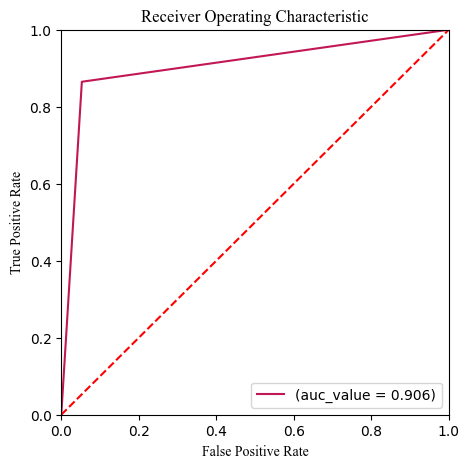


Confusion Matrix: 


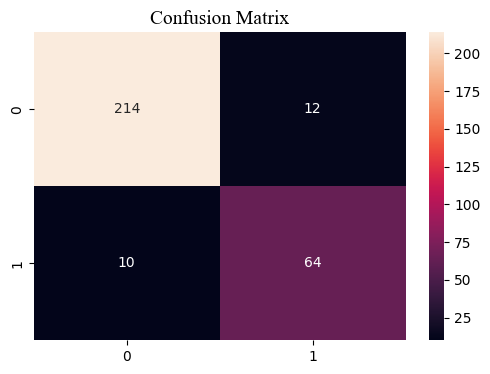

In [128]:
svm_model = SVC(random_state=42)
result(svm_model)

# Random Forest Classifier (RFC)


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       226
           1       0.85      0.81      0.83        74

    accuracy                           0.92       300
   macro avg       0.89      0.88      0.89       300
weighted avg       0.92      0.92      0.92       300

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9166666666666666

----------------------------------------------------------------------------------------------------

F1 Score:  0.8275862068965518

----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8810691222195648

----------------------------------------------------------------------------------------------------



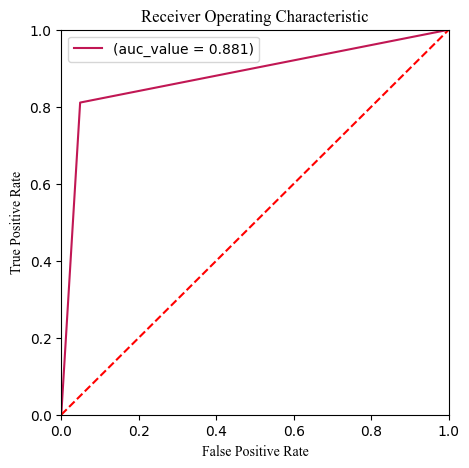


Confusion Matrix: 


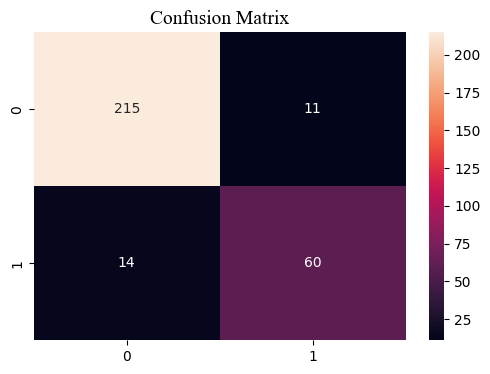

In [129]:
rf = RandomForestClassifier(random_state = 42)
result(rf)

# Logistic Regression


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       226
           1       0.77      0.95      0.85        74

    accuracy                           0.92       300
   macro avg       0.88      0.93      0.90       300
weighted avg       0.93      0.92      0.92       300

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9166666666666666

----------------------------------------------------------------------------------------------------

F1 Score:  0.8484848484848485

----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9265127959818225

----------------------------------------------------------------------------------------------------



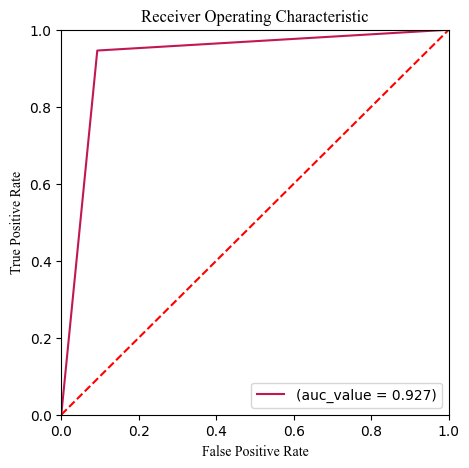


Confusion Matrix: 


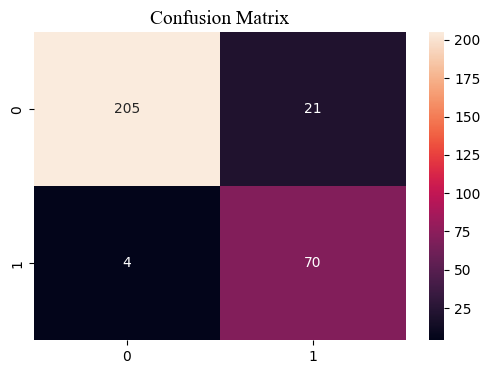

In [130]:
lr = LogisticRegression(C=1e-3)
result(lr)

# XGBoost


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       226
           1       0.80      0.81      0.81        74

    accuracy                           0.90       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.90      0.90      0.90       300

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9033333333333333

----------------------------------------------------------------------------------------------------

F1 Score:  0.8053691275167786

----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8722195646974409

----------------------------------------------------------------------------------------------------



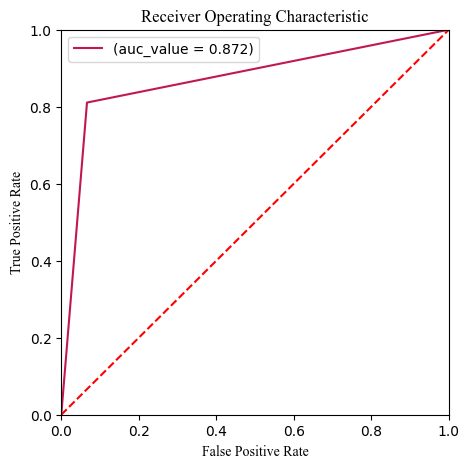


Confusion Matrix: 


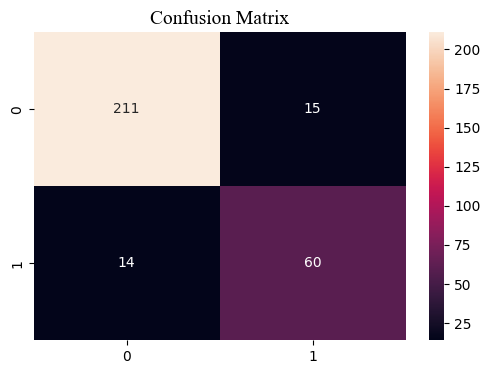

In [131]:
xgb = xgb.XGBClassifier()
result(xgb)

# Multiple Layer Perceptron


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       226
           1       0.75      0.85      0.80        74

    accuracy                           0.89       300
   macro avg       0.85      0.88      0.86       300
weighted avg       0.90      0.89      0.90       300

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.8933333333333333

----------------------------------------------------------------------------------------------------

F1 Score:  0.7974683544303798

----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.8792154986845252

----------------------------------------------------------------------------------------------------



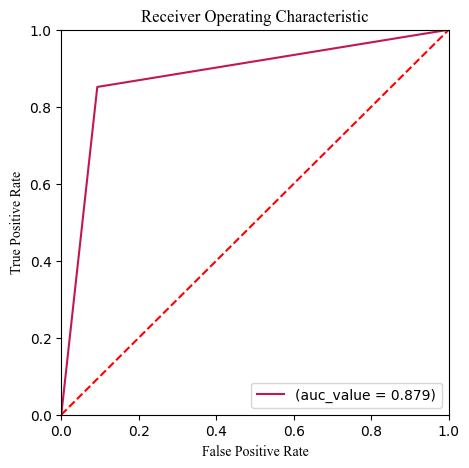


Confusion Matrix: 


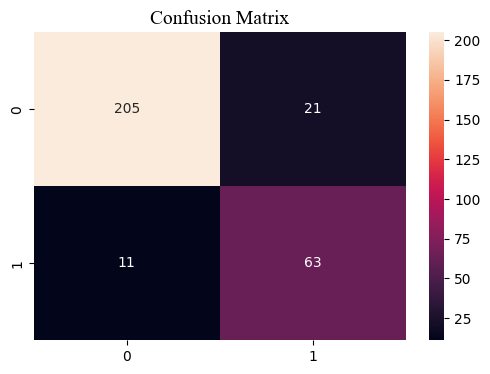

In [132]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
result(model)

# Model Tuning

Model tuning, also known as hyperparameter tuning, refers to the process of optimizing the hyperparameters of our models to achieve better performance. 

In [133]:
list_class = []

This list will be utilized to store performance metrics such as Accuracy, F1-score, Recall, and Precision for comparison purposes at the end of the tuning process.

# Adjusting SVM Model

In [134]:
param_grid = {
    'C': [0.1,0.01, 1.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

svm_model = SVC(random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

best_svm_model = grid_search.best_estimator_

print(f'Best Hyperparameters: {grid_search.best_params_}')
print()
print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))
print()

y_pred = best_svm_model.predict(X_test_scaled)

Accuracy1 = accuracy_score(y_test, y_pred)
ROCAUC1 = roc_auc_score(y_test, y_pred)
Precision1 = precision_score(y_test, y_pred)
Recall1 = recall_score(y_test, y_pred)
F11 = f1_score(y_test, y_pred)

print("Test Accuracy with Best Parameters: {:.4f}".format(Accuracy1))

Best Hyperparameters: {'C': 1.0, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}

Best Cross-validated Accuracy: 0.9223

Test Accuracy with Best Parameters: 0.9267


In [135]:
list_class.append(('SVM',Accuracy1, ROCAUC1, Precision1, Recall1, F11))

# Adjusting RFC Model

In [136]:
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 8] 
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters: ")
print()
print(grid_search.best_params_)
print()
print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))
print()

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)
Accuracy2 = accuracy_score(y_test, y_pred)
ROCAUC2 = roc_auc_score(y_test, y_pred)
Precision2 = precision_score(y_test, y_pred)
Recall2 = recall_score(y_test, y_pred)
F12 = f1_score(y_test, y_pred)

print()
print("Test Accuracy with Best Parameters: {:.4f}".format(Accuracy2))

Best Parameters: 

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Cross-validated Accuracy: 0.9290


Test Accuracy with Best Parameters: 0.9167


In [137]:
list_class.append(('Random Forest',Accuracy2, ROCAUC2, Precision2, Recall2, F12))

# Adjusting LR Model

In [138]:
logreg = LogisticRegression()

param_grid = {'C': [0.0001,0.001,0.01], 'max_iter': [50, 100],'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
print("Best Parameters: ")
print(grid_search.best_params_)
print()
print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))
print()

best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)
Accuracy3 = accuracy_score(y_test, y_pred)
ROCAUC3 = roc_auc_score(y_test, y_pred)
Precision3 = precision_score(y_test, y_pred)
Recall3 = recall_score(y_test, y_pred)
F13 = f1_score(y_test, y_pred)

print("Test Accuracy with Best Parameters: {:.3f}".format(Accuracy3))

Best Parameters: 
{'C': 0.01, 'max_iter': 50, 'penalty': 'l2'}

Best Cross-validated Accuracy: 0.9046

Test Accuracy with Best Parameters: 0.920


In [139]:
list_class.append(('Logistic Regression',Accuracy3, ROCAUC3, Precision3, Recall3, F13))

# Adjusting XGB Model

In [140]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Parameters:")
print(best_params)
print()
print("Best Cross-validated Accuracy: {:.4f}".format(grid_search.best_score_))
print()

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
Accuracy4 = accuracy_score(y_test, y_pred)
ROCAUC4 = roc_auc_score(y_test, y_pred)
Precision4 = precision_score(y_test, y_pred)
Recall4 = recall_score(y_test, y_pred)
F14 = f1_score(y_test, y_pred)

print(f'Test Accuracy with the Best parameters: {Accuracy4:.5f}')

Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}

Best Cross-validated Accuracy: 0.9290

Test Accuracy with the Best parameters: 0.90667


In [141]:
list_class.append(('XGBoost',Accuracy4, ROCAUC4, Precision4, Recall4, F14))

# Adjusting MLP Model

In [142]:
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (32, 16)],
    'activation': ['relu', 'tanh', 'logistic'],
    'max_iter': [500, 1000, 1500],
}

mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
Accuracy5 = accuracy_score(y_test, y_pred)
ROCAUC5 = roc_auc_score(y_test, y_pred)
Precision5 = precision_score(y_test, y_pred)
Recall5 = recall_score(y_test, y_pred)
F15 = f1_score(y_test, y_pred)

print(f'Test Accuracy with the Best parameters: {Accuracy5:.5f}')

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (32, 16), 'max_iter': 500}
Test Accuracy with the Best parameters: 0.92333


In [143]:
list_class.append(('MLP',Accuracy5, ROCAUC5, Precision5, Recall5, F15))

# Model Comparison

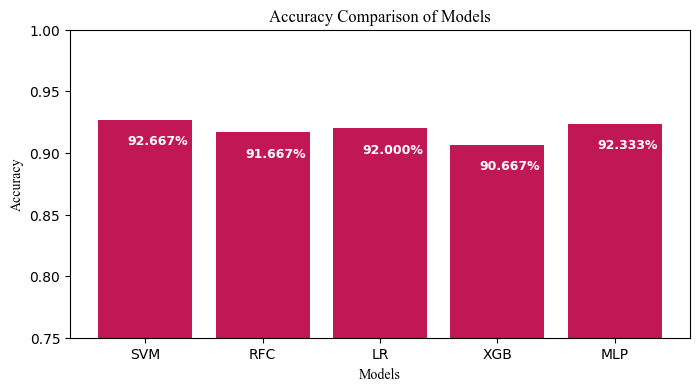

In [144]:
accuracy_values = [Accuracy1, Accuracy2, Accuracy3, Accuracy4, Accuracy5]
model_names = ['SVM', 'RFC', 'LR', 'XGB', 'MLP']

plt.figure(figsize=(8, 4))
bars = plt.bar(model_names, accuracy_values, color='blue')

plt.bar(model_names, accuracy_values, color='#c11754')
plt.xlabel('Models',fontname='Times New Roman')
plt.ylabel('Accuracy',fontname='Times New Roman')
plt.title('Accuracy Comparison of Models',fontname='Times New Roman')
plt.ylim(0.75, 1)
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.02, f'{acc*100:.3f}%', fontsize=9, color='white',weight = 'bold')

plt.show()

In [145]:
res = pd.DataFrame(list_class, columns=["Classifier", "Accuracy","ROC-AUC", "Precision", "Recall", "F1"])
res

,Classifier,Accuracy,ROC-AUC,Precision,Recall,F1
0,SVM,0.926667,0.905884,0.842105,0.864865,0.853333
1,Random Forest,0.916667,0.881069,0.845070,0.810811,0.827586
2,Logistic Regression,0.920000,0.928725,0.777778,0.945946,0.853659
3,XGBoost,0.906667,0.869888,0.819444,0.797297,0.808219
4,MLP,0.923333,0.899127,0.840000,0.851351,0.845638


The evaluation metrics consistently indicate that the Support Vector Machine outperforms other models, demonstrating superior performance across the considered metrics.

# Rebuilding the Model with the best Hyperparameters

In [154]:
svm_model = SVC(C=1.0, class_weight=None, gamma='scale', kernel='rbf', random_state=42,probability=True)
svm_model.fit(X_resampled, y_resampled)

SVC(probability=True, random_state=42)

# SHAP Values (XAI Method) for Feature Importance

SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output.

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

 - Summary plot

Using 1802 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|█████████████████████████████████████████| 300/300 [23:24<00:00,  4.68s/it]


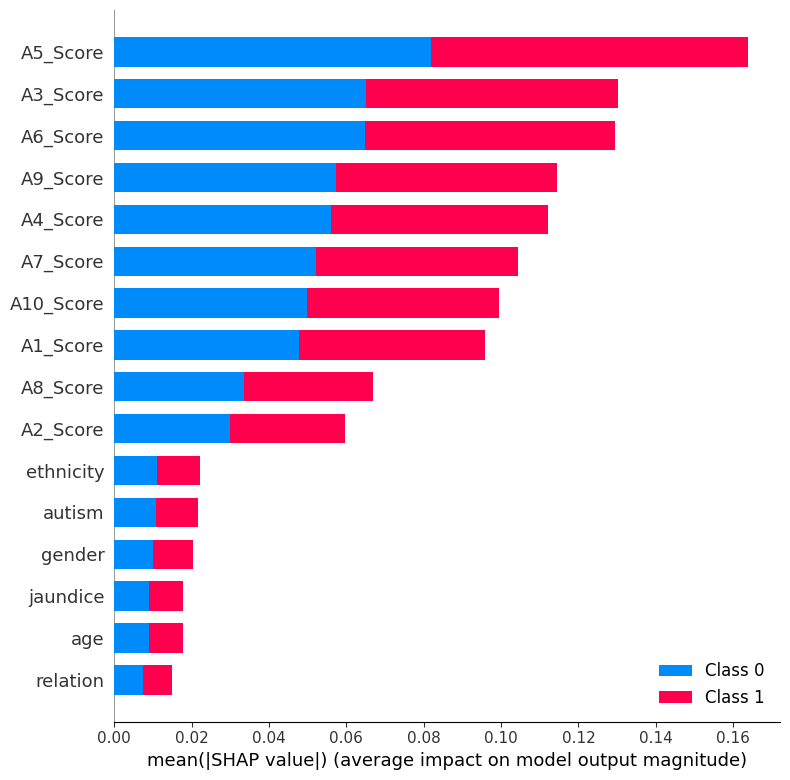

In [155]:
explainer = shap.KernelExplainer(svm_model.predict_proba, X_resampled)
shap_values = explainer.shap_values(X_test_scaled, nsamples=100)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")

The Summary plot shows the feature importance of each feature in the model. The results show that "A5_Score","A3_Score",and "A6_Score", and "A9_Score" play major roles in determining the results.

 - Summary plot of the label 0

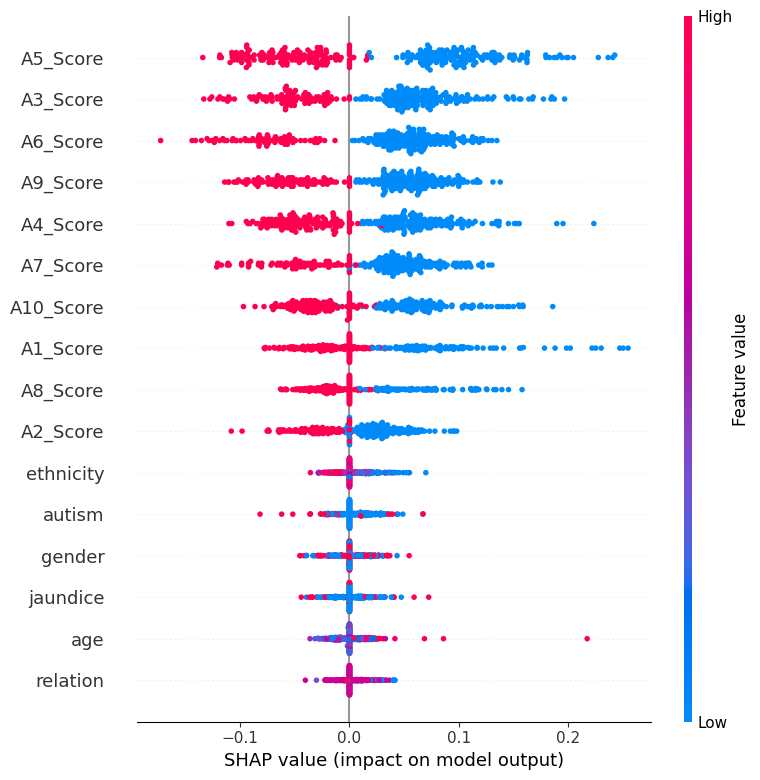

In [156]:
shap.summary_plot(shap_values[0], features=X_test_scaled, feature_names=X.columns)

- The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.
- If we look at the feature "A5_Score", we will see that it is mostly high with a negative SHAP value. It means higher A5_Score counts tend to negatively affect the output.
- In other words, higher counts of ‘A5_Score’ contribute to a lower likelihood of the instance being classified as class 0.

For label "1" the visualization will be flipped.

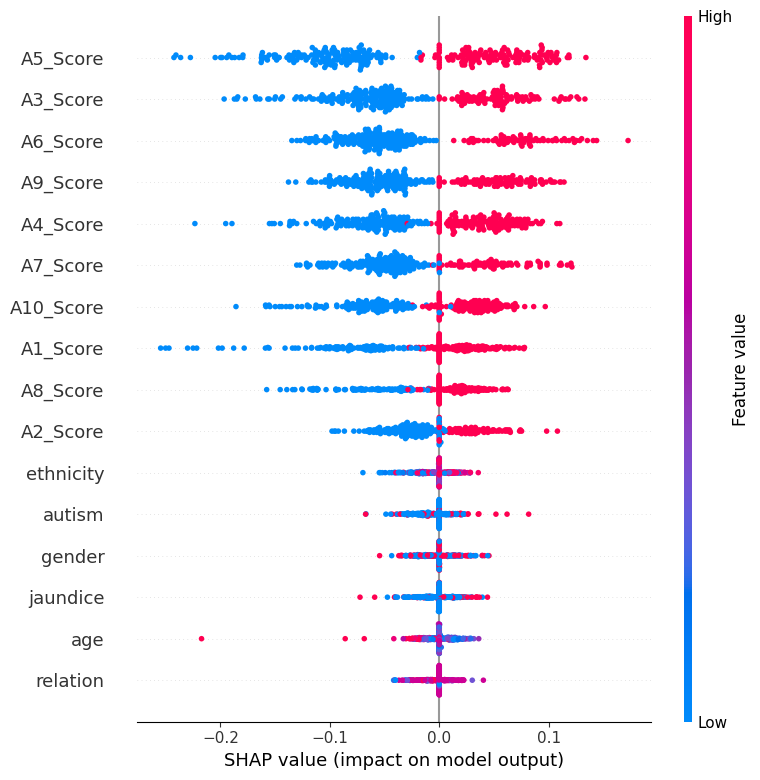

In [157]:
shap.summary_plot(shap_values[1], features=X_test_scaled, feature_names=X.columns)

 - Force Plot

We will use the first sample in the testing set to determine which features contributed to the "0" result.

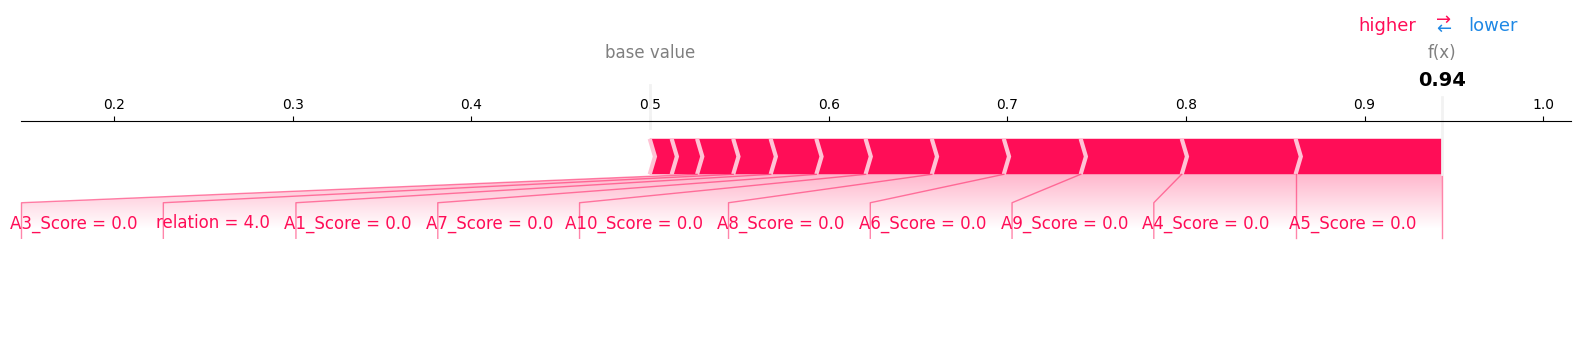

In [158]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

We can clearly see that a zero value in jaundice feature, and all AQ test scores except A4_Score have contributed to negative ASD results. The term "negative results" here typically means that the presence or likelihood of ASD is not indicated or is low.

Let's look at Class/ASD with label "1".

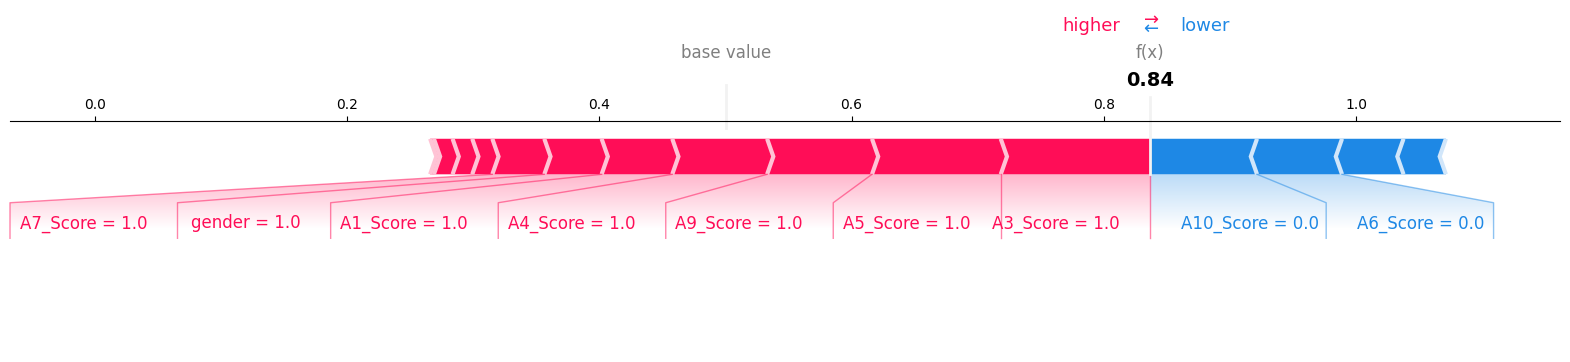

In [159]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

We can see that the 4 features "A3_Score", "A4_Score","A5_Score", "A9_Score" with 1 as a value have contributed the most to positive ASD results. 

# Final Results

After considering all interpretations and conducting a feature importance analysis, we can conclude that Autism Spectrum Disorder is closely associated with difficulties in multitasking, challenges in quickly resuming the current task after an interruption, limitations in inferring meaning beyond explicit communication, and a reduced ability to understand others' thoughts through facial expressions.

# Model Deployment

 - Creating a pickle file to save the model

In [160]:
pickle_out = open("/Users/nouhailanigrou/Desktop/ID/ID2/S3/ML/ASD/classification.pkl","wb")
joblib.dump(svm_model, pickle_out)
pickle_out.close()

 - Saving the scaling and label encoding model as well

In [161]:
with open('/Users/nouhailanigrou/Desktop/ID/ID2/S3/ML/ASD/scaling_model.pkl', 'wb') as file:
    joblib.dump(scaler, file)

with open('/Users/nouhailanigrou/Desktop/ID/ID2/S3/ML/ASD/label_encoder.pkl', 'wb') as file:
    joblib.dump(label_encoder, file)